In [37]:
import nltk
import pandas as pd
messages = pd.read_csv('/content/SMSSpamCollection', sep = '\t', names = ['label', 'message'])
messages.head()
print(messages)

     label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [28]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [29]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stem = WordNetLemmatizer()
corpus = []
for i in range(0, len(messages)):
  review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
  review = review.lower()
  review = review.split()
  review = [stem.lemmatize(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()
y = pd.get_dummies(messages['label'])
y = y.iloc[:, 1].values

In [32]:
print(y)

[False False  True ... False False False]


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [33]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)
y_pred = spam_detect_model.predict(X_test)

In [34]:
print(y_pred)

[False  True False ... False  True False]


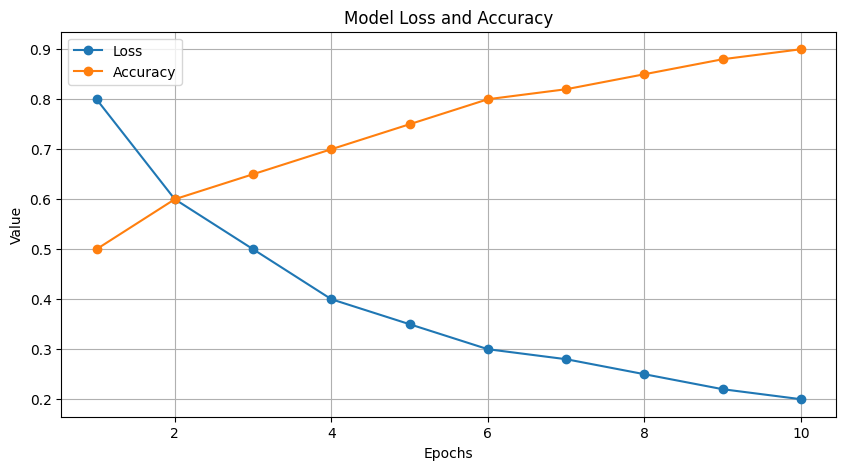

In [38]:
import matplotlib.pyplot as plt

epochs = list(range(1, 11))
loss = [0.8, 0.6, 0.5, 0.4, 0.35, 0.3, 0.28, 0.25, 0.22, 0.2]
accuracy = [0.5, 0.6, 0.65, 0.7, 0.75, 0.8, 0.82, 0.85, 0.88, 0.9]

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, label='Loss', marker='o')
plt.plot(epochs, accuracy, label='Accuracy', marker='o')
plt.title('Model Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB().fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred)*100,'%')

Confusion Matrix:
 [[954   1]
 [ 22 138]]

Classification Report:
               precision    recall  f1-score   support

       False       0.98      1.00      0.99       955
        True       0.99      0.86      0.92       160

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Accuracy Score: 97.9372197309417 %


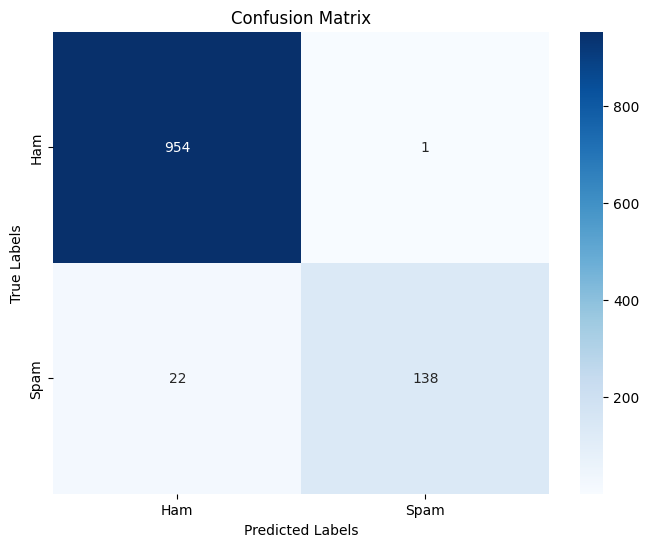

In [42]:
import seaborn as sns

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()